# Multicompartment Model of Multiple Sclerosis

Developed by Corey Chitwood, loosely based on Multicompartment Model of Vascularized Solid Tumors by Gautam Machiraju, and advised by Dr. Hermann Frieboes






### Importing Scripts and Packages

In [1]:
from new_ms_model import *
from new_ms_plotter import *
from ms_stress_function import *

import numpy as np
import os
import sys
import matplotlib.pyplot as plt
import math
from tqdm import tqdm_notebook as tqdm
import csv

### Defining Global Parameters

The 'parameters' dictionary contains parameter values that can be passed to functions within the separate python scripts. The parameter values are constants throughout all scripts, and are not changed by any of the scripts.

In [2]:
'''number of compartments (5 is standard)'''
n = 5 

maxIter = 300

'''initial conditions'''
IC_L = 1000  #number of OLG
IC_N = IC_L * 2.9 #number of neurons

'''healthy shedding rates'''
uh_ec = 4.56e-1
uh_nec = 4.56e-2 #factor of 10 smaller than ec

'''necrotic shedding rates'''
un_ec = 4.56e1
un_nec = 4.56e2 #factor of 10 larger than ec

'''ratio of neuron shedding to oligodendrocyte shedding'''
a = IC_L / IC_N * 10

'''protein elimination rate'''
kE_ec = 1
kE_nec = 1


'''cell growth rates'''
kBL_0 = 0.001
kBL_max = 0.1

birth_rate_type = 1
# birth_rate_type can be exponential (1) or linear (2)

# assume 0 neuronal growth, so we don't need a parameter as this does not change


'''death rates'''
kDL_0 = 0
kDN_0 = 0 
kDL_max = 0.05
kDN_max = 0.05

death_rate_type = 3
# death_rate_type can be exponential (1), linear (2), or 'CnDeathsOnly' (3) (where oligodendrocytes will only die if they are in the
# n'th stress compartment)

'''probability of becomming stressed/time'''
prob_stress_0 = 0.05 #update/sensitivity analysis
prob_stress_max = 0.2 #update/sensitivity analysis

prob_type = 1
# prob_type can be exponential (1), or linear (2)


'''number of relapse/remission cycles'''
# each cycle represents the number of relapses, which will be followed in the model with an associated period of remission

num_cycles = 1
# num_cycles can be 1, 2, or 3 (only 1 for now)

stress_length = 200
remission_length = 100

stresst0 = 0

stress_type = 1
#change stress_type to sigmoidal(1), linear(2), exponential(3), or log(4) 
#dependinging on desired model of oxidative stress


remissiont0 = stresst0 + stress_length

remission_type = 1
#change remission_type to sigmoidal(1), linear(2), exponential(3), or log(4)
#dependinging on desired model of remission


sigmoidal_steepness = 1
# does not affect stress curves unless the sigmoidal stress type is selected

# this value must be greater than 0.5 (if stress_length = 100) to create a functional "stairstep" stress function
# the larger this value, the more the function becomes like a unit step function
# the smaller this value, the more gradual the function grows from one step to the next


parameters = {}
#parameters added to a dictionary so that they can be passed to each function


for variable in ['n', 'maxIter', 'IC_N', 'IC_L', 'uh_ec', 'uh_nec', 'kE_ec', 'kE_nec', 'kBL_0', 'birth_rate_type', 
    'kBL_max', 'kDL_max', 'kDN_max','death_rate_type', 'prob_stress_0', 'prob_stress_max', 'prob_type', 'num_cycles',
    'stress_length', 'remission_length', 'stresst0', 'remissiont0','stress_type','remission_type', 'kDL_0', 
    'un_nec','un_ec','a','sigmoidal_steepness']:
    parameters[variable] = eval(variable)







#### Save original parameters for later reference

In [3]:
with open('original_parameters.csv', 'w') as csv_file:  
    writer = csv.writer(csv_file)
    for key, value in parameters.items():
       writer.writerow([key, value])
csv_file.close()

#### Compare current parameters to original

In [4]:
original = {}
with open('original_parameters.csv', 'r') as csv_file:
    reader = csv.reader(csv_file)
    for rows in reader:
        if not rows:
            continue
        original[rows[0]] = float(rows[1])

no_difference = original == parameters

if no_difference == False:
    diff = set(original.items()).symmetric_difference(parameters.items())
    print(diff)
    raise SystemExit("Parameters are diff than original. Save previous data to its own folder and run the subsequent cells.")
if no_difference == True:
    raise SystemExit("Parameters are same as original. No need to rerun.")

SystemExit: Parameters are same as original. No need to rerun.

C:\Users\Corey\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3445: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


### Results Dictionary

Defining a dictionary to store results that will be updated with data from each function from the scripts. This will allow for data to be passed between scripts and functions

In [5]:
results = {}

# 1. Oxidative Stress


### Stress Type


Changes in the type of equation used to model oxidative stress affect the rate of disease progression. 

Dashed lines represent separation between compartments.


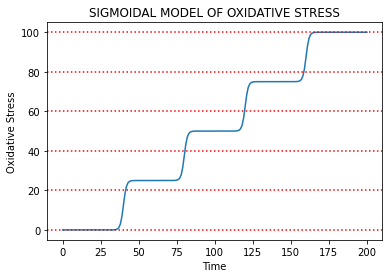

In [6]:
stresslevel0 = 0

# current inputs: t0, length, stress level, stress type, n
stress = oxidative_stress_equation(parameters, stresst0, stresslevel0, 0)
# n previously defined as number of compartments


#current inputs: stress, n, stress_type, t0, length
plot_stress_equation(stress, n, stress_type, stresst0, stress_length)


### Remission type

Changes in the type of equation used to model remission affect the rate that oxidative stress returns to the baseline. 

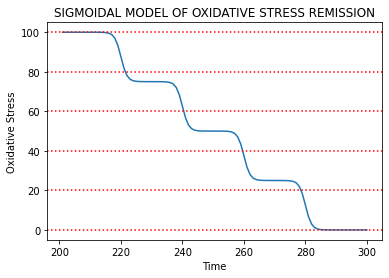

In [7]:
remissionlevel0 = max(stress)

remission = remission_equation(parameters, remissiont0, remissionlevel0, 0)


#current inputs: remission, n, remission type, t0, length
plot_remission_equation(remission, n, remission_type, remissiont0, remission_length)


### Overall Stress Equation Example

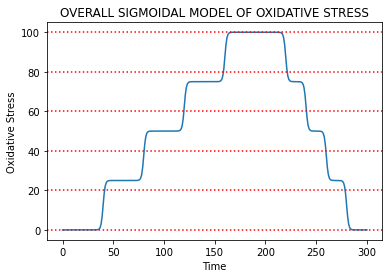

In [8]:
overall_stress = np.append(stress, remission)

# current inputs: overall_stress, stress_type, remission_type, t0, tmax
plot_overall_stress(overall_stress, stress_type, remission_type, n, stresst0, remissiont0 + remission_length)

# 2. Growth Model

In [9]:
oligodendrocyte_growth(parameters, results)

Running Oligodendrocyte Stress, Relapse #1:   0%|          | 0/200 [00:00<?, ?it/s]

Running Oligodendrocyte Stress, Remission #1:   0%|          | 0/100 [00:00<?, ?it/s]

In [10]:
neuron_growth(parameters, results)

Running Neuron Stress, Relapse #1:   0%|          | 0/267 [00:00<?, ?it/s]

Running Neuron Stress, Remission #1:   0%|          | 0/33 [00:00<?, ?it/s]

##### Growth Model Plots

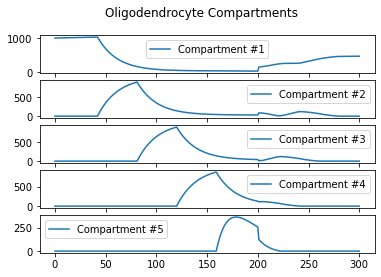

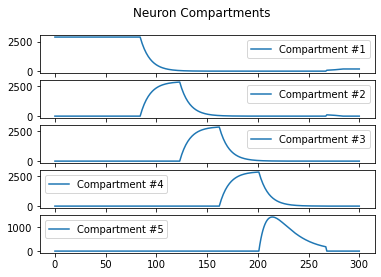

In [11]:
plot_compartments_vs_time(parameters, results)

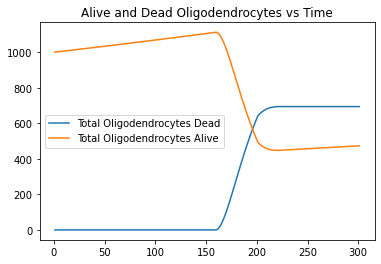

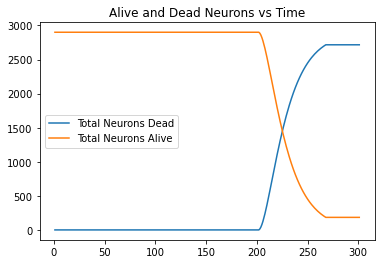

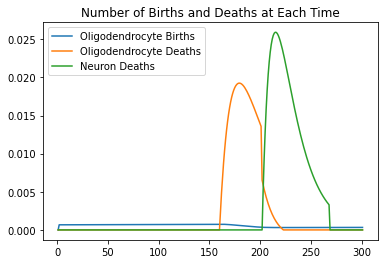

In [12]:
plot_alive_dead_vs_time(parameters, results)

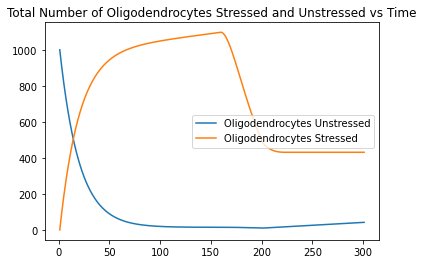

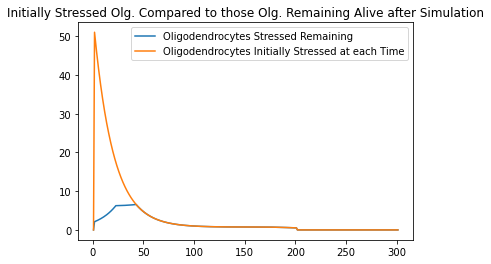

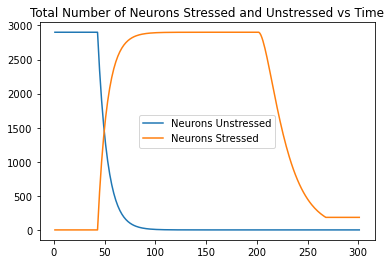

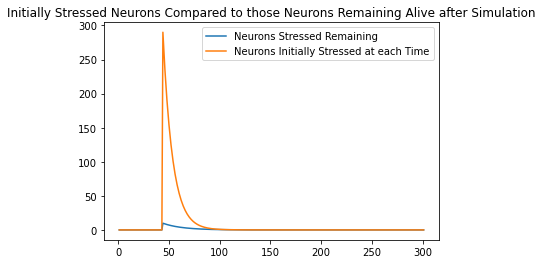

In [13]:
plot_stressed_unstressed_vs_time(parameters, results)

# 3. Shedding Model

In [14]:
protein_shedding(parameters, results)

Running Protein Shedding Analysis:   0%|          | 0/300 [00:00<?, ?it/s]

##### Shedding Model Plots

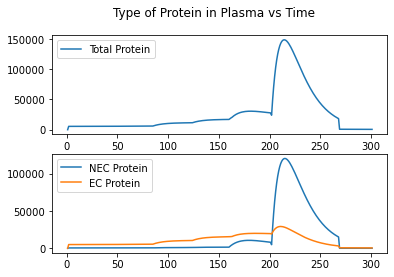

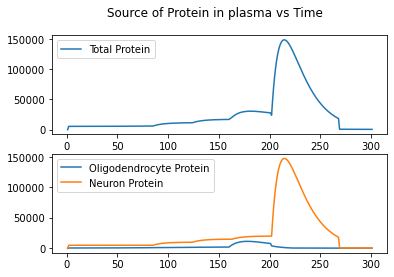

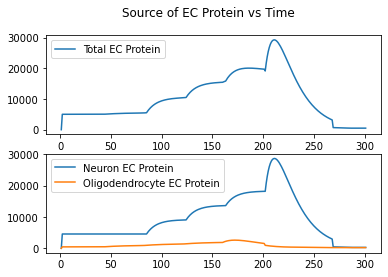

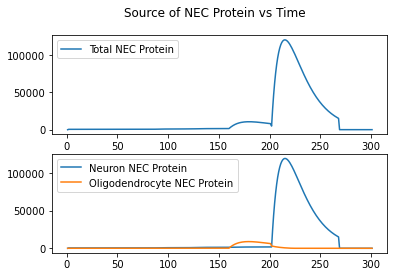

In [15]:
plot_protein_shedding(parameters, results)

In [ ]:
results['total_prot']
for i in range(0, (len(results['total_prot']) - 1)):
    if (results['total_prot'][i] > results['total_prot'][i - 1]) & (results['total_prot'][i] > results['total_prot'][i + 1]):
        print(i, results['total_prot'][i])

In [ ]:
results['total_L_prot']
for i in range(0, (len(results['total_L_prot']) - 1)):
    if (results['total_L_prot'][i] > results['total_L_prot'][i - 1]) & (results['total_L_prot'][i] > results['total_L_prot'][i + 1]):
        print(i, results['total_L_prot'][i])

In [ ]:
results['total_N_prot']
for i in range(0, (len(results['total_N_prot']) - 1)):
    if (results['total_N_prot'][i] > results['total_N_prot'][i - 1]) & (results['total_N_prot'][i] > results['total_N_prot'][i + 1]):
        print(i, results['total_N_prot'][i])

In [ ]:
results['total_ec_prot']
for i in range(0, (len(results['total_ec_prot']) - 1)):
    if (results['total_ec_prot'][i] > results['total_ec_prot'][i - 1]) & (results['total_ec_prot'][i] > results['total_ec_prot'][i + 1]):
        print(i, results['total_ec_prot'][i])

In [ ]:
results['total_nec_prot']
for i in range(0, (len(results['total_nec_prot']) - 1)):
    if (results['total_nec_prot'][i] > results['total_nec_prot'][i - 1]) & (results['total_nec_prot'][i] > results['total_nec_prot'][i + 1]):
        print(i, results['total_nec_prot'][i])

In [ ]:
results['current_N_nec']
for i in range(0, (len(results['current_N_nec']) - 1)):
    if (results['current_N_nec'][i] > results['current_N_nec'][i - 1]) & (results['current_N_nec'][i] > results['current_N_nec'][i + 1]):
        print(i, results['current_N_nec'][i])

In [ ]:
results['current_N_ec']
for i in range(0, (len(results['current_N_ec']) - 1)):
    if (results['current_N_ec'][i] > results['current_N_ec'][i - 1]) & (results['current_N_ec'][i] > results['current_N_ec'][i + 1]):
        print(i, results['current_N_ec'][i])

In [ ]:
results['current_L_nec']
for i in range(0, (len(results['current_L_nec']) - 1)):
    if (results['current_L_nec'][i] > results['current_L_nec'][i - 1]) & (results['current_L_nec'][i] > results['current_L_nec'][i + 1]):
        print(i, results['current_L_nec'][i])

In [ ]:
results['current_L_ec']
for i in range(0, (len(results['current_L_ec']) - 1)):
    if (results['current_L_ec'][i] > results['current_L_ec'][i - 1]) & (results['current_L_ec'][i] > results['current_L_ec'][i + 1]):
        print(i, results['current_L_ec'][i])